In [1]:
! kaggle datasets download vipullrathod/fish-market
! unzip fish-market.zip

Dataset URL: https://www.kaggle.com/datasets/vipullrathod/fish-market
License(s): CC0-1.0
  0% 0.00/2.38k [00:00<?, ?B/s]
100% 2.38k/2.38k [00:00<00:00, 6.14MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
print(data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [16]:
print(data.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


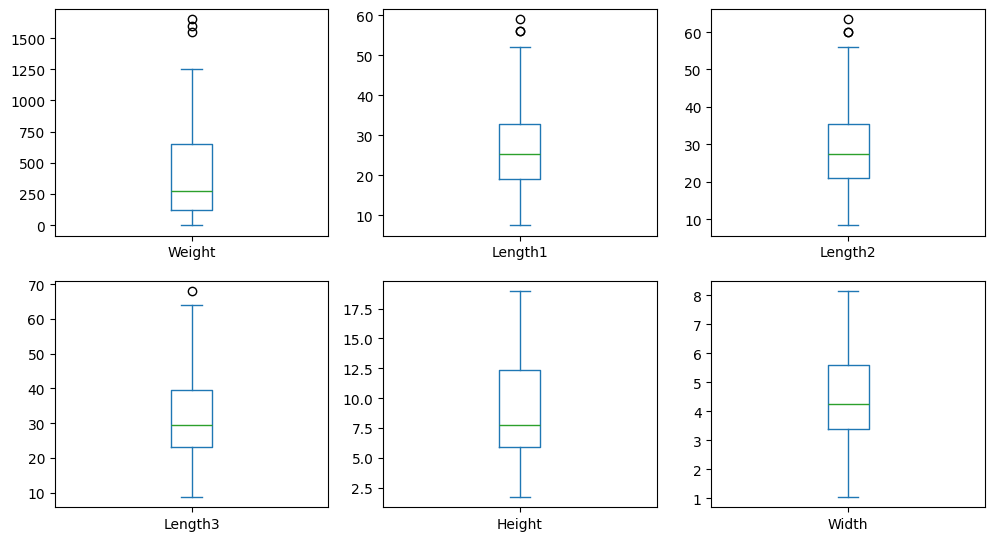

In [20]:
data = pd.get_dummies(data, columns=['Species'], drop_first=True)

data.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12,10))
plt.show()


In [24]:
def rem_outlier_using_clipping(datafram, lower_quantile=0.05, upper_quantile=0.95):
  df = datafram.copy()
  for col in data.columns:
    if df[col].dtype != 'object' and df[col].dtype != 'bool':
      lower_bound = df[col].quantile(lower_quantile)
      upper_bound = df[col].quantile(upper_quantile)
      df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
  return df

data = rem_outlier_using_clipping(data)

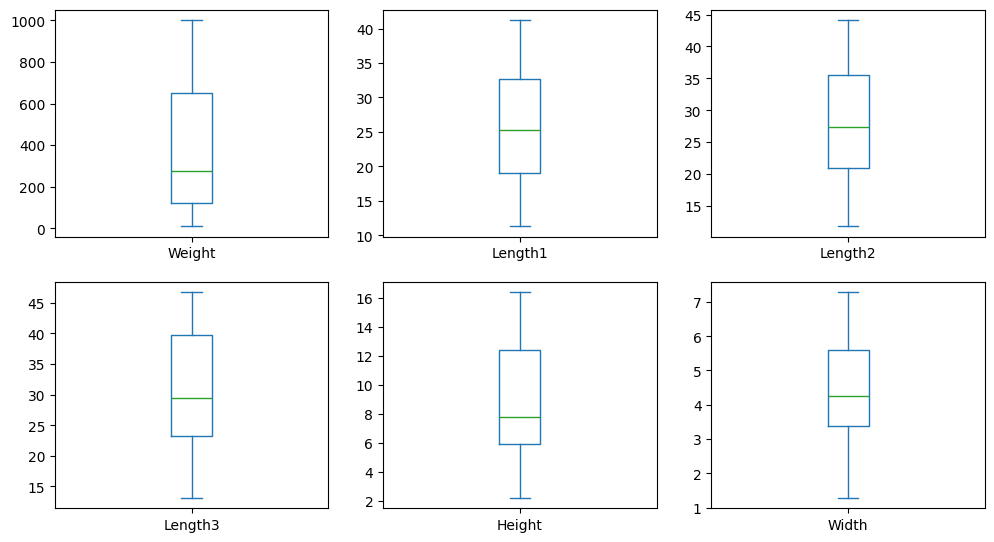

In [26]:
data.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12,10))
plt.show()

In [28]:
target = data['Weight']

features = data.drop('Weight', axis=1)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set Size: {X_train.shape[0]}")
print(f"Validation Set Size: {X_val.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")

model = LinearRegression()
model.fit(X_train, y_train)

Training Set Size: 111
Validation Set Size: 24
Test Set Size: 24


LinearRegression()

In [30]:
y_val_pred = model.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {mse_val}")
print(f"Validation R^2 Score: {r2_val}")

Validation Mean Squared Error: 6378.633919092128
Validation R^2 Score: 0.9286509797364321


In [31]:
y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

Test Mean Squared Error: 5923.06116165049
Test R^2 Score: 0.9549148460205104


In [32]:
import joblib

joblib.dump(model, 'fish_weight_model.pkl')

['fish_weight_model.pkl']

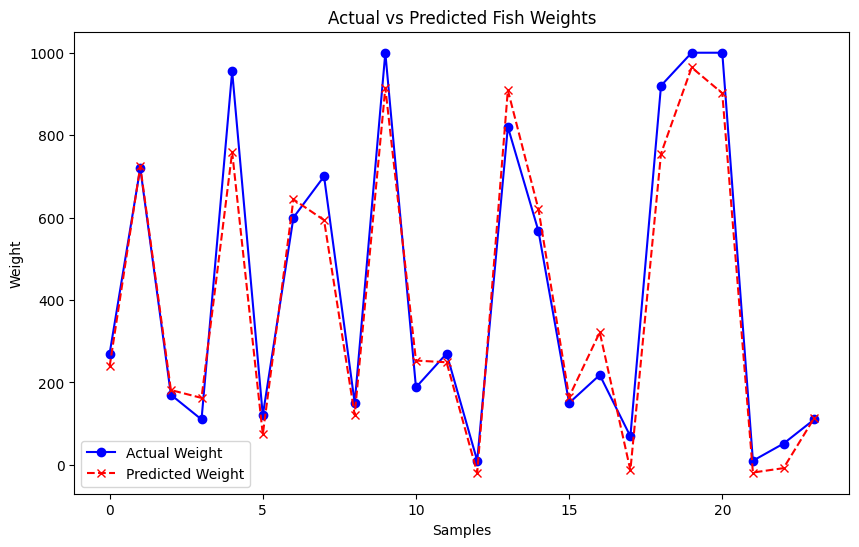

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Weight', marker='o', linestyle='-', color='blue')
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted Weight', marker='x', linestyle='--', color='red')
plt.xlabel('Samples')
plt.ylabel('Weight')
plt.title('Actual vs Predicted Fish Weights')
plt.legend()
plt.show()
